Za pomocą języka R przeanalizować dowolne dane z poprzednich laboratoriów. 

W jednej tabeli języka R należy umieścić wyniki dwóch różnych eksperymentów (t.j. czas działania dwóch różnych funkcji) dla różnych parametrów (t.j. rozmiarów wektora(macierzy))

Tabela powinna zawierać dane z 10-krotnego uruchomienia tego samego eksperymentu dla tych samych parametrów (dla każdego takiego zestawu)


In [38]:
naive = read.csv("../lab3/matrices/naive.csv")
better = read.csv("../lab3/matrices/better.csv")
blas = read.csv("../lab3/matrices/blas.csv")

avg_naive = aggregate( result ~ size, data=naive, FUN=mean)
avg_better = aggregate( result ~ size, data=better, FUN=mean)
avg_blas = aggregate( result ~ size, data=blas, FUN=mean)

avg_naive$sd = aggregate(result ~ size, data=naive, FUN=sd)$result
avg_better$sd = aggregate(result ~ size, data=better, FUN=sd)$result
avg_blas$sd = aggregate(result ~ size, data=blas, FUN=sd)$result


In [39]:
avg_naive

size,result,sd
0,0.0000000,0.000000e+00
20,0.0002611,4.018969e-05
40,0.0010040,5.450782e-04
60,0.0020516,5.933745e-05
80,0.0047267,1.039413e-04
100,0.0090720,7.708149e-05
120,0.0157786,3.860752e-04
140,0.0249331,2.943356e-04
160,0.0380515,1.583554e-03
180,0.0533089,9.943120e-04


Należy przedstawić wykresy średnich czasów obliczenia wybranych funkcji w zależności od rozmiaru wektora (macierzy)

Wykresy powinny zawierać informację o odchyleniu standardowym dla uzyskanych wyników. Słupki błędów można narysować korzystając z funkcji geom_errorbar pakietu ggplot2 . 

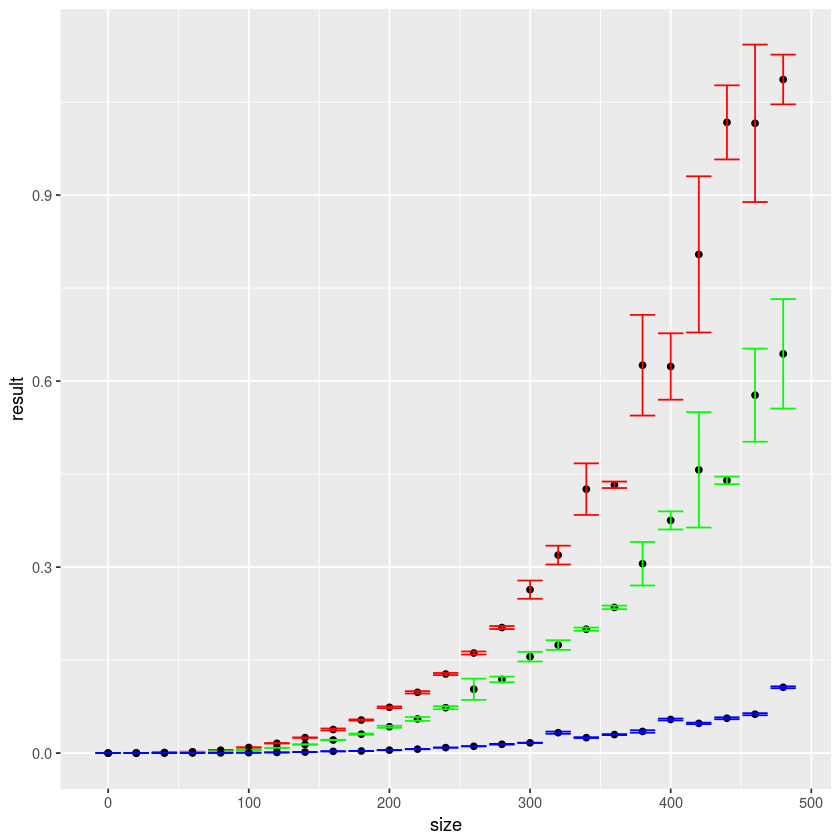

In [69]:
library("ggplot2")

ggplot() + 
geom_point(data=avg_naive, mapping=aes(x=size, y=result)) + 
geom_errorbar(data=avg_naive, mapping=aes(x=size, ymin=result-sd, ymax=result+sd), color="red") +

geom_point(data=avg_better, mapping=aes(x=size, y=result)) + 
geom_errorbar(data=avg_better, mapping=aes(x=size, ymin=result-sd, ymax=result+sd), color="green") +

geom_point(data=avg_blas, mapping=aes(x=size, y=result)) + 
geom_errorbar(data=avg_blas, mapping=aes(x=size, ymin=result-sd, ymax=result+sd), color="blue")

Uzyc aproksymacji wielomianowej dostepnej w jezyku R do znalezienia odpowiednich wielomianow, ktore najlepiej pasuja do wynikow kazdego z algorytmow. Dodac wykresy uzyskanych wielomianow do wykresu. 

In [75]:
naive_fit = lm(result ~ poly(size, 3, raw=TRUE), data=avg_naive)
better_fit = lm(result ~ poly(size, 3, raw=TRUE), data=avg_better)
blas_fit = lm(result ~ poly(size, 3, raw=TRUE), data=avg_blas)

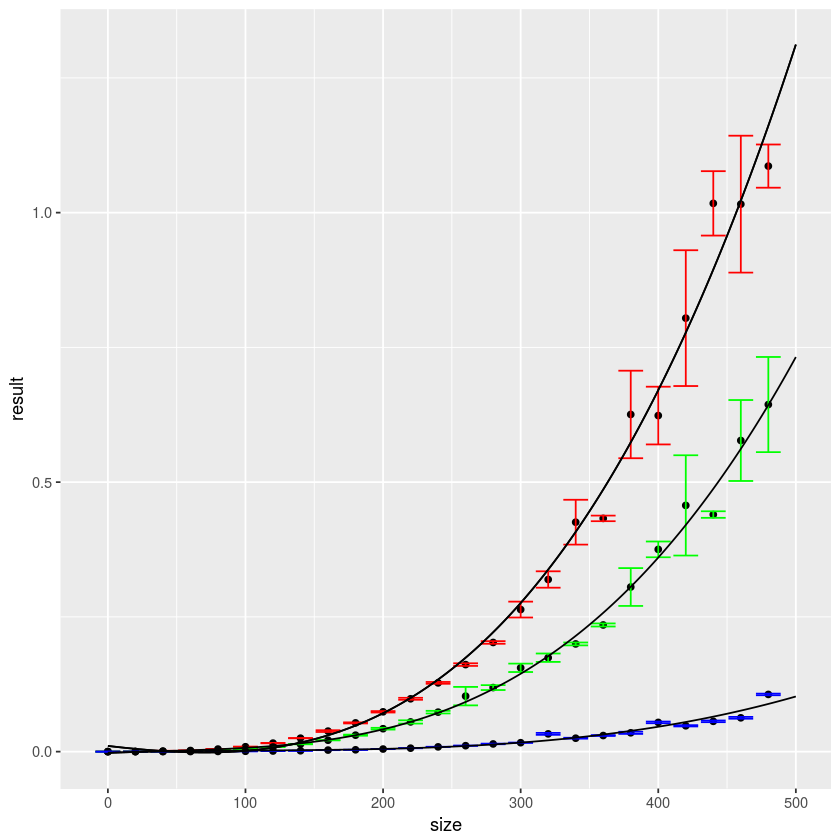

In [74]:
naive_line = data.frame(size=seq(0,500))
naive_line$result = predict(naive_fit, naive_line)

better_line = data.frame(size=seq(0,500))
better_line$result = predict(better_fit, better_line)

blas_line = data.frame(size=seq(0,500))
blas_line$result = predict(blas_fit, blas_line)

last_plot() + 
geom_line(data=naive_line, mapping=aes(size, result)) +
geom_line(data=better_line, mapping=aes(size, result)) +
geom_line(data=blas_line, mapping=aes(size, result))